<a href="https://colab.research.google.com/github/hdtphat/AI_W5/blob/main/AI_W5_04_03_23_Exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cài fuzzy logic
!pip install -U scikit-fuzzy
# thêm thư viện
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



✅ **EXERCISE 01: Prediction of rainfall using fuzzy logic**

4.171957228167497


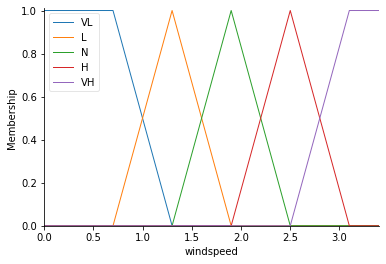

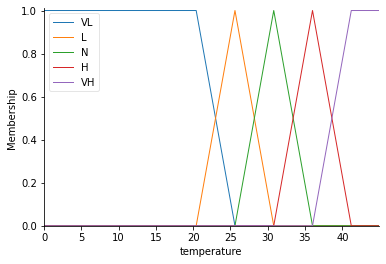

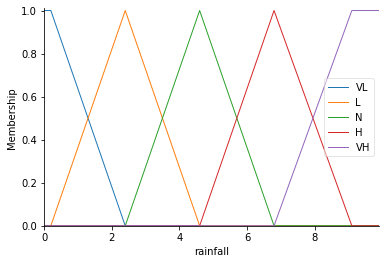

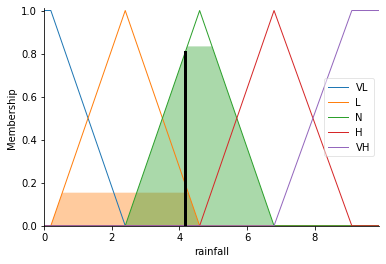

In [ ]:
# biến vào (windspeed, temperature)
windspeed = ctrl.Antecedent(np.arange(0,3.5,0.1),'windspeed')
temperature = ctrl.Antecedent(np.arange(0,45,0.1),'temperature')

# biến ra (rainfall)
rainfall = ctrl.Consequent(np.arange(0,10,0.1),'rainfall')

# tạo các giá trị cho bảng
windspeed['VL'] = fz.trapmf(windspeed.universe, [0,0,0.7,1.3])
windspeed['L']  = fz.trimf(windspeed.universe, [0.7,1.3,1.9])
windspeed['N']  = fz.trimf(windspeed.universe, [1.3,1.9,2.5])
windspeed['H']  = fz.trimf(windspeed.universe, [1.9,2.5,3.1])
windspeed['VH'] = fz.trapmf(windspeed.universe, [2.5,3.1,3.5,3.5])
windspeed.view()

temperature['VL'] = fz.trapmf(temperature.universe, [0,0,20.4,25.6])
temperature['L']  = fz.trimf(temperature.universe, [20.4,25.6,30.8])
temperature['N']  = fz.trimf(temperature.universe, [25.6,30.8,36])
temperature['H']  = fz.trimf(temperature.universe, [30.8,36,41.2])
temperature['VH'] = fz.trapmf(temperature.universe, [36,41.2,45,45])
temperature.view()

rainfall['VL'] = fz.trapmf(rainfall.universe, [0,0,0.2,2.4])
rainfall['L']  = fz.trimf(rainfall.universe, [0.2,2.4,4.6])
rainfall['N']  = fz.trimf(rainfall.universe, [2.4,4.6,6.8])
rainfall['H']  = fz.trimf(rainfall.universe, [4.6,6.8,9.1])
rainfall['VH'] = fz.trapmf(rainfall.universe, [6.8,9.1,10,10])
rainfall.view()

#tạo các rules 
rule_1 = ctrl.Rule(windspeed['VL']& temperature['VL'], rainfall['VL'])
rule_2 = ctrl.Rule(windspeed['VL']& temperature['L'],  rainfall['VL'])
rule_3 = ctrl.Rule(windspeed['VL']& temperature['N'],  rainfall['L'])
rule_4 = ctrl.Rule(windspeed['VL']& temperature['H'],  rainfall['N'])
rule_5 = ctrl.Rule(windspeed['VL']& temperature['VH'], rainfall['H'])

rule_6  = ctrl.Rule(windspeed['L']& temperature['VL'], rainfall['VL'])
rule_7  = ctrl.Rule(windspeed['L']& temperature['L'],  rainfall['L'])
rule_8  = ctrl.Rule(windspeed['L']& temperature['N'],  rainfall['L'])
rule_9  = ctrl.Rule(windspeed['L']& temperature['H'],  rainfall['N'])
rule_10 = ctrl.Rule(windspeed['L']& temperature['VH'], rainfall['N'])

rule_11 = ctrl.Rule(windspeed['N']& temperature['VL'], rainfall['L'])
rule_12 = ctrl.Rule(windspeed['N']& temperature['L'],  rainfall['L'])
rule_13 = ctrl.Rule(windspeed['N']& temperature['N'],  rainfall['N'])
rule_14 = ctrl.Rule(windspeed['N']& temperature['H'],  rainfall['H'])
rule_15 = ctrl.Rule(windspeed['N']& temperature['VH'], rainfall['VH'])

rule_16 = ctrl.Rule(windspeed['H']& temperature['VL'], rainfall['L'])
rule_17 = ctrl.Rule(windspeed['H']& temperature['L'],  rainfall['L'])
rule_18 = ctrl.Rule(windspeed['H']& temperature['N'],  rainfall['N'])
rule_19 = ctrl.Rule(windspeed['H']& temperature['H'],  rainfall['H'])
rule_20 = ctrl.Rule(windspeed['H']& temperature['VH'], rainfall['H'])

rule_21 = ctrl.Rule(windspeed['VH']& temperature['VL'], rainfall['N'])
rule_22 = ctrl.Rule(windspeed['VH']& temperature['L'],  rainfall['N'])
rule_23 = ctrl.Rule(windspeed['VH']& temperature['N'],  rainfall['H'])
rule_24 = ctrl.Rule(windspeed['VH']& temperature['H'],  rainfall['VH'])
rule_25 = ctrl.Rule(windspeed['VH']& temperature['VH'], rainfall['VH'])

# dạy máy học
rainfall_calc = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10, rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19, rule_20, rule_21, rule_22, rule_23, rule_24, rule_25])
rainfall_sim = ctrl.ControlSystemSimulation(rainfall_calc)

#cho input dau vao
rainfall_sim.input['windspeed'] = 2
rainfall_sim.input['temperature'] = 30

#tinh toan
rainfall_sim.compute()

#hien thi ket qua
print(rainfall_sim.output['rainfall'])
rainfall.view(sim = rainfall_sim)